In [1]:
import pandas as pd
%matplotlib inline

import eia_client as ec

# Build an endpoint
Assuming your API key is in your current environmental variables as EIA_API_KEY or you have it saved in `~/.eia.config` you can instantiatie ApiEndpointBuilder with no arguments.

In [2]:
total_energy = ec.endpoint.TotalEnergy(msn="ELETPUS")
endpoint = total_energy.build()

ELEPTUS is the "mnemonic series name" for Electricity Net Generation Total (including from sources not shown), All Sectors in Million Kilowatthours.

It was found through the EIA API browser:

https://www.eia.gov/opendata/browser/total-energy

1. Click on link
2. API ROUTE > Select route > Total Energy
3. FREQUENCY > Select requency > Monthly
4. FILTER BY FACET > Select Filter > Unique Series Identifier
5. Search for the series you would like.



# Issue a GET request to the API

<font color='red'>WARNING</font> The below cell issues a request to EIA's remote server, you only need to call it once.

In [3]:
client = ec.Client()
resp = client.get(endpoint)

In [4]:
df = ec.parse.as_dataframe(resp)

In [5]:
resp.status_code

200

In [6]:
series_description = df.seriesDescription[0]

In [7]:
df["period"] = pd.to_datetime(df.period)

In [8]:
df.set_index("period", inplace=True)

In [9]:
df.head()

,msn,seriesDescription,value,unit
period,,,,
2022-10-01,ELETPUS,Electricity Net Generation Total (including fr...,314048.288,Million Kilowatthours
2022-09-01,ELETPUS,Electricity Net Generation Total (including fr...,350919.559,Million Kilowatthours
2022-08-01,ELETPUS,Electricity Net Generation Total (including fr...,412534.108,Million Kilowatthours
2022-07-01,ELETPUS,Electricity Net Generation Total (including fr...,423718.200,Million Kilowatthours
2022-06-01,ELETPUS,Electricity Net Generation Total (including fr...,380617.467,Million Kilowatthours


In [10]:
df.value.describe()

count       598.000000
mean     275109.033400
std       71673.201328
min      139589.440000
25%      206683.613000
50%      289665.403000
75%      327620.636500
max      423718.200000
Name: value, dtype: float64

<AxesSubplot: title={'center': 'Electricity Net Generation Total (including from sources not shown), All Sectors in Million Kilowatthours'}, xlabel='period'>

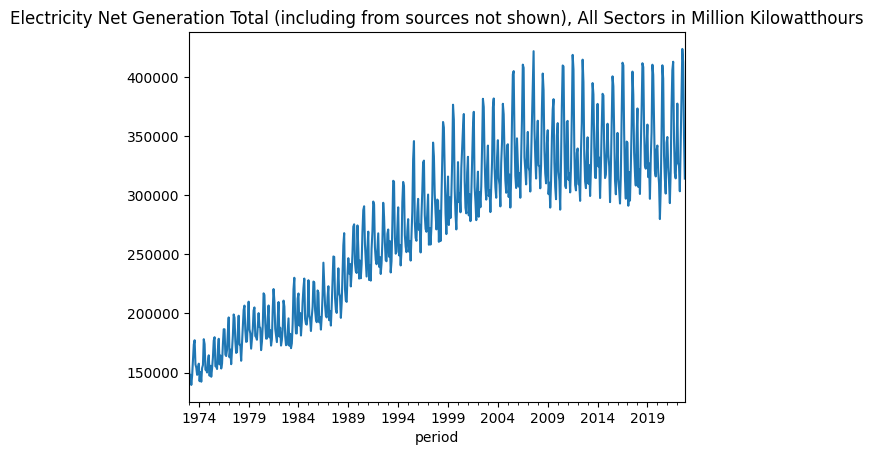

In [11]:
df.value.plot(title=series_description)